<a href="https://colab.research.google.com/github/Ranjit246/FIRE2023_Multi_label_classification/blob/main/Multilabel_classification_batch_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import necessary libraries for the experiment

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing libraries
import tensorflow as tf
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import text, sequence
from keras import initializers, regularizers, constraints, optimizers, layers
# from keras.models import Model, Input, Sequential
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
from sklearn.model_selection  import train_test_split
#from sklearn.cross_validation import train_test_split


# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim
import os
import re

sns.set_style("whitegrid")
np.random.seed(0)

<ipython-input-2-7f32e2c9f284>:33: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
!pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.3 MB/s eta 0:00:00


In [4]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import chart_studio

import plotly
import chart_studio.tools as tls
tls.set_credentials_file(username='Ranjitp20', api_key='fdiMaKL4GolfD0Wg7pD3')

# Install dependencies
!apt install graphviz
!pip install pydot pydot-ng
!echo "Double check with Python 3"
!python -c "import pydot"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Double check with Python 3


### Loading the necessary data files and data Preparation

In [5]:
#from google.colab import files
#uploaded = files.upload()

#from google.colab import drive
#!kaggle competitions download -c Toxic Comment Classification Challenge -p /content/gdrive/My\ Drive/kaggle/Colab Notebooks/Dataset

In [6]:
#Train data
train = pd.read_csv('/content/drive/MyDrive/FIRE/dataset/train.csv')
train.head(10)

,tweet,side-effect,ineffective,rushed,pharma,mandatory,unnecessary,political,ingredients,conspiracy,country,religious,none
0,cath__kath astrazeneca made kidney cells litt...,0,0,0,0,0,0,0,1,0,0,0,0
1,begins please find safe alternatives vaccine ...,1,0,0,0,0,0,0,0,0,0,0,0
2,trying speak writing letters government speak...,1,0,1,0,0,0,0,0,0,0,0,0
3,dailymailuk im confused vaccine still require...,0,1,0,0,1,0,0,0,0,0,0,0
4,need crazy twisted politician telling us whet...,0,0,0,0,0,0,1,0,0,0,0,0
5,agreet0d1sagree matteo30115900 femi_sorry res...,0,0,0,0,1,0,0,0,0,0,0,0
6,taking one team teamcanada new astraseen just...,1,0,0,0,0,0,0,0,0,0,0,0
7,canadians received astrazeneca vaccine exclud...,1,1,0,0,0,0,0,0,0,0,0,0
8,mom want take vaccine bad im,0,0,0,0,0,0,0,0,0,0,0,1
9,carnellanita annaberu yes culled virus vaccine,0,0,0,0,0,0,0,0,1,0,0,0


In [7]:
train = train.loc[(train['side-effect'] == 1) | (train["ineffective"] == 1) | (train['rushed'] == 1) | (train['pharma'] == 1) | (train['pharma'] == 1) | (train['mandatory'] == 1) | (train['unnecessary'] == 1) | (train['political'] == 1) | (train['ingredients'] == 1) | (train['conspiracy'] == 1) | (train['country'] ==1) | (train['religious'] ==1) | (train['none'] ==1)]
train.head(10)

,tweet,side-effect,ineffective,rushed,pharma,mandatory,unnecessary,political,ingredients,conspiracy,country,religious,none
0,cath__kath astrazeneca made kidney cells litt...,0,0,0,0,0,0,0,1,0,0,0,0
1,begins please find safe alternatives vaccine ...,1,0,0,0,0,0,0,0,0,0,0,0
2,trying speak writing letters government speak...,1,0,1,0,0,0,0,0,0,0,0,0
3,dailymailuk im confused vaccine still require...,0,1,0,0,1,0,0,0,0,0,0,0
4,need crazy twisted politician telling us whet...,0,0,0,0,0,0,1,0,0,0,0,0
5,agreet0d1sagree matteo30115900 femi_sorry res...,0,0,0,0,1,0,0,0,0,0,0,0
6,taking one team teamcanada new astraseen just...,1,0,0,0,0,0,0,0,0,0,0,0
7,canadians received astrazeneca vaccine exclud...,1,1,0,0,0,0,0,0,0,0,0,0
8,mom want take vaccine bad im,0,0,0,0,0,0,0,0,0,0,0,1
9,carnellanita annaberu yes culled virus vaccine,0,0,0,0,0,0,0,0,1,0,0,0


### Clean the Train data, specifically remove punctuations

In [8]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in train['tweet']:

    #cleanedString = re.sub('[^a-zA-Z]+', '', sen)

    p = sen.translate(transString)
    totalContentCleaned.append(p)


train['tweet'] = totalContentCleaned
# we can save the file to csv if we want in local machine
#df.to_csv(os.path.join(os.path.abspath('data'), 'train_cleaned.csv'), index = False)

train.head(10)

,tweet,side-effect,ineffective,rushed,pharma,mandatory,unnecessary,political,ingredients,conspiracy,country,religious,none
0,cathkath astrazeneca made kidney cells little...,0,0,0,0,0,0,0,1,0,0,0,0
1,begins please find safe alternatives vaccine ...,1,0,0,0,0,0,0,0,0,0,0,0
2,trying speak writing letters government speak...,1,0,1,0,0,0,0,0,0,0,0,0
3,dailymailuk im confused vaccine still require...,0,1,0,0,1,0,0,0,0,0,0,0
4,need crazy twisted politician telling us whet...,0,0,0,0,0,0,1,0,0,0,0,0
5,agreet0d1sagree matteo30115900 femisorry resp...,0,0,0,0,1,0,0,0,0,0,0,0
6,taking one team teamcanada new astraseen just...,1,0,0,0,0,0,0,0,0,0,0,0
7,canadians received astrazeneca vaccine exclud...,1,1,0,0,0,0,0,0,0,0,0,0
8,mom want take vaccine bad im,0,0,0,0,0,0,0,0,0,0,0,1
9,carnellanita annaberu yes culled virus vaccine,0,0,0,0,0,0,0,0,1,0,0,0


In [9]:
#Test data
test = pd.read_csv('/content/drive/MyDrive/FIRE/dataset/test.csv')
test.head(10)

,tweet,side-effect,ineffective,rushed,pharma,mandatory,unnecessary,political,ingredients,conspiracy,country,religious,none
0,paolaqp1231 well mean congratulations covid19...,1,0,0,0,0,0,0,0,0,0,0,0
1,borisjohnson us wish vaccine given vaccine pa...,0,0,0,0,1,0,0,0,0,0,0,0
2,edrybicki given murky history sputnik vaccine...,0,1,0,1,0,0,0,0,0,0,0,0
3,likethemountain kassiekitson honestly made in...,1,0,0,0,0,0,0,0,0,0,0,0
4,pfizer pharmaceutical made product mandated j...,0,0,0,1,1,0,0,0,0,0,0,0
5,pfizer vaccine government tryna give calculat...,0,0,0,0,0,0,0,0,0,0,0,1
6,mdaware oxford vaccine safe virologists studi...,1,0,0,0,0,0,0,0,0,0,0,0
7,valoakley25 seasidedad1 prisoner1968 point ma...,0,1,0,0,0,0,0,0,0,0,0,0
8,realdonaldtrump americans would like see cure...,0,0,0,0,0,0,0,0,0,0,0,1
9,locked wearing masks college school work onli...,0,0,0,1,0,0,0,0,0,0,0,0


### Clean the Test data, specifically remove punctuations

In [10]:
totalContentCleaned = []
punctDict = {}
for punct in string.punctuation:
    punctDict[punct] = None
transString = str.maketrans(punctDict)
# since we intent to remove any punctuation with ''
for sen in test['tweet']:

    #cleanedString = re.sub('[^a-zA-Z]+', '', sen)

    p = sen.translate(transString)
    totalContentCleaned.append(p)


test['tweet'] = totalContentCleaned
# we can save the file to csv if we want in local machine
#df.to_csv(os.path.join(os.path.abspath('data'), 'train_cleaned.csv'), index = False)

test.head(10)

,tweet,side-effect,ineffective,rushed,pharma,mandatory,unnecessary,political,ingredients,conspiracy,country,religious,none
0,paolaqp1231 well mean congratulations covid19...,1,0,0,0,0,0,0,0,0,0,0,0
1,borisjohnson us wish vaccine given vaccine pa...,0,0,0,0,1,0,0,0,0,0,0,0
2,edrybicki given murky history sputnik vaccine...,0,1,0,1,0,0,0,0,0,0,0,0
3,likethemountain kassiekitson honestly made in...,1,0,0,0,0,0,0,0,0,0,0,0
4,pfizer pharmaceutical made product mandated j...,0,0,0,1,1,0,0,0,0,0,0,0
5,pfizer vaccine government tryna give calculat...,0,0,0,0,0,0,0,0,0,0,0,1
6,mdaware oxford vaccine safe virologists studi...,1,0,0,0,0,0,0,0,0,0,0,0
7,valoakley25 seasidedad1 prisoner1968 point ma...,0,1,0,0,0,0,0,0,0,0,0,0
8,realdonaldtrump americans would like see cure...,0,0,0,0,0,0,0,0,0,0,0,1
9,locked wearing masks college school work onli...,0,0,0,1,0,0,0,0,0,0,0,0


In [11]:
# df_test_labels = pd.read_csv('D:/çankaya/2ndYEAR/Thesis/Experiments/Data_Toxic Comment Classification/test_labels.csv')

# df_test_labels.head(10)

In [12]:
# test_labels = df_test_labels[(df_test_labels[['toxic','severe_toxic', 'obscene', 'threat',
#                                         'insult', 'identity_hate']] != -1).all(axis=1)]
# test_labels.head(10)

### Merge the df_test and test_labels into 1 dataframe (test)

In [13]:
# #Merge the df_test and test_labels into 1 dataframe (test)
# test = pd.merge(test_labels, df_test, on='id', how='inner')
# test.head(10)

In [14]:
# test = test.loc[(test['toxic'] == 1) | (test['severe_toxic'] == 1) | (test['obscene'] ==1) | (test['threat'] == 1) | (test['insult'] == 1) | (test['identity_hate'] ==1)]

# test.head(10)

### Number of records in the train and test data

In [15]:
print("Train data shape", train.shape)
print("Test data shape", test.shape)

Train data shape (7924, 13)
Test data shape (1997, 13)


In [16]:
# check that there are no missing values in either training set
print('The dataset has', train.isna().sum().sum(), 'missing values in train data.')
print('The dataset has', test.isna().sum().sum(), 'missing values in test data.')

# check if there are any duplicates
print('The dataset has', train.duplicated().sum(), 'duplicates in train data.')
print('The dataset has', test.duplicated().sum(), 'duplicates in test data.')

The dataset has 0 missing values in train data.
The dataset has 0 missing values in test data.
The dataset has 2 duplicates in train data.
The dataset has 0 duplicates in test data.


### CORRELATION BETWEEN DATA LABELS

<ipython-input-17-643f721c944d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);


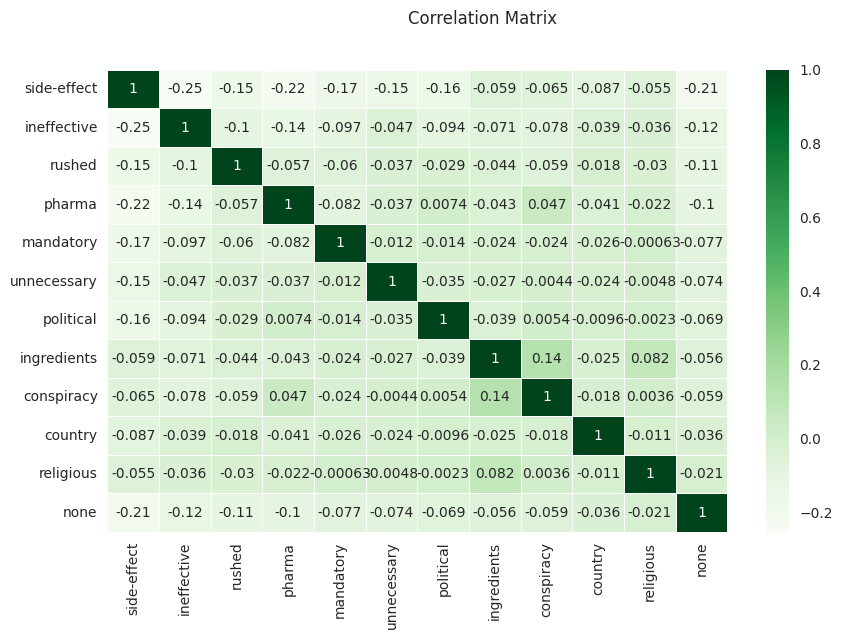

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(train.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

The correlation figure below shows that Toxic" comments are clearly correlated with both "obscene" and "insult" comments. Interestingly, "toxic" and "severe_toxic" are only weakly correlated. While we can also observe that, "Obscene" comments and "insult" comments are also highly correlated, which makes perfect sense.

### DATA PREPROCESSING
Deep Neural Networks input layers make use of input variables to feed the network for training the model. But in this task (experiment), we're dealing with words text. How do we represent these words in order to feed our model?

In our experiment, we used densed representation of those text (comments) and their semanticity together. The advantage of using this approach is the best way for fitting neural networks onto a text data (as in our case), as well as less memory usage compared to other sparse representation approaches.


#### Word Embedding
Two ways to feed embeddings to neural networks:
   * Using your own word embeddings by training
   * Using pre-trained embedding (e.g Word2vec, lad2vec, Glove etc)
   


In [18]:
train.columns

Index(['tweet', 'side-effect', 'ineffective', 'rushed', 'pharma', 'mandatory',
       'unnecessary', 'political', 'ingredients', 'conspiracy', 'country',
       'religious', 'none'],
      dtype='object')

In [19]:
#Convert text to vectors using keras preprocessing library tools

X_train = train["tweet"].values
X_test  = test["tweet"].values

y_train = train[['side-effect', 'ineffective', 'rushed', 'pharma', 'mandatory',
       'unnecessary', 'political', 'ingredients', 'conspiracy', 'country',
       'religious', 'none']].values
y_test  = test[['side-effect', 'ineffective', 'rushed', 'pharma', 'mandatory',
       'unnecessary', 'political', 'ingredients', 'conspiracy', 'country',
       'religious', 'none']].values






For the first embedding, we used keras preprocessing (Text Preprocessing) libraries. This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf

In [20]:
num_words = 20000 #Max. workds to use per toxic comment
max_features = 200000 #Max. number of unique words in embeddinbg vector
max_len = 200 #Max. number of words per toxic comment to be use
embedding_dims = 128 #embedding vector output dimension
num_epochs = 15 # (before 5)number of epochs (number of times that the model is exposed to the training dataset)
val_split = 0.1
batch_size2 = 256 #(before 32)The **batch size** is the number of training examples in one forward/backward pass.
                  # In general, larger batch sizes result in faster progress in training, but don't always converge as quickly.
                  #Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.

In [21]:
#toxic comments Tokenization
tokenizer = tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized toxic commnent to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

# padding the sequences
X_train = tf.keras.utils.pad_sequences(X_train, max_len)
X_test  = tf.keras.utils.pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (7924, 200)
X_test shape:  (1997, 200)


##We use cross validation to split arrays or matrices of train data into random train and validation subsets

In [22]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.9, random_state=233)

# METHODS (NN, CNN , RNN, LSTM, without pre-trained embedding)

#### We used early callback functionality that allows you to specify the performance measure to monitor, the trigger, and once triggered. It will stop the training process.

In [23]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

#### Using Precision, Recall, F1-Measure, AUC, mean etc evaluaiton metrics to evaluate our model

In [24]:
#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

  #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')

    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

In [25]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

## 1) Neural Network (NN)

In [26]:
# nn_model = Sequential([
#     Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
#     GlobalMaxPool1D(),
#     Dense(50, activation = 'relu'),
#     Dropout(0.3),
#     Dense(12, activation = 'sigmoid')
# ])

### Compile the NN model

In [27]:
# #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
# def mean_pred(y_true, y_pred):
#     return K.mean(y_pred)

# nn_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', 'mean_pred', 'fmeasure', 'precision', 'auroc', 'recall'])

In [28]:
# nn_model_fit = nn_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

In [29]:
y_tra = y_tra.astype('int32')
y_val = y_val.astype('int32')

In [30]:
print(X_tra.dtype, y_tra.dtype, X_val.dtype, y_val.dtype)

int32 int32 int32 int32


In [31]:
print(X_tra.shape, y_tra.shape, X_val.shape, y_val.shape)

(7131, 200) (7131, 12) (793, 200) (793, 12)


### Visualize the Orchestrated NN Architecture

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalMaxPool1D, Dense, Dropout

nn_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    GlobalMaxPool1D(),
    Dense(50, activation='relu'),
    Dropout(0.3),
    Dense(12, activation='sigmoid')
])

# nn_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, auroc, recall])
nn_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
nn_model_fit = nn_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
28/28 [==============================] - 5s 25ms/step - loss: 0.3818 - accuracy: 0.2563 - val_loss: 0.2813 - val_accuracy: 0.4124
Epoch 2/15
28/28 [==============================] - 1s 23ms/step - loss: 0.2807 - accuracy: 0.3891 - val_loss: 0.2532 - val_accuracy: 0.4830
Epoch 3/15
28/28 [==============================] - 1s 22ms/step - loss: 0.2426 - accuracy: 0.5103 - val_loss: 0.2305 - val_accuracy: 0.5410
Epoch 4/15
28/28 [==============================] - 1s 22ms/step - loss: 0.2005 - accuracy: 0.6389 - val_loss: 0.2182 - val_accuracy: 0.5763
Epoch 5/15
28/28 [==============================] - 1s 30ms/step - loss: 0.1640 - accuracy: 0.7302 - val_loss: 0.2137 - val_accuracy: 0.5750
Epoch 6/15
28/28 [==============================] - 1s 23ms/step - loss: 0.1331 - accuracy: 0.7894 - val_loss: 0.2183 - val_accuracy: 0.5914
Epoch 7/15
28/28 [==============================] - 1s 22ms/step - loss: 0.1087 - accuracy: 0.8289 - val_loss: 0.2294 - val_accuracy: 0.5788
Epoch 8/15
28

In [33]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          25600000  
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 50)                6450      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 12)                612       
                                                                 
Total params: 25,607,062
Trainable params: 25,607,062
Non-trainable params: 0
____________________________________________

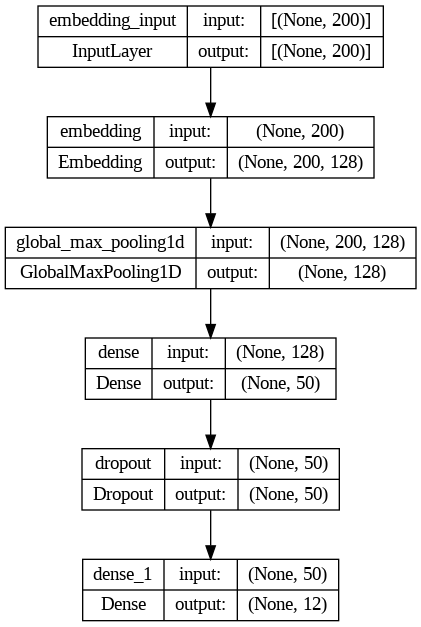

In [34]:
#plot the nn_model architecture

plot_model(nn_model, to_file='nn_model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='nn_model_plot.png')

### Evaluate the NN accuracy of our trained model

In [35]:
nn_train_score = nn_model.evaluate(X_tra, y_tra, batch_size = batch_size2, verbose = 1)
print('Train loss:', nn_train_score[0])
print('Train accuracy:', nn_train_score[1])

28/28 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9201
Train loss: 0.045712243765592575
Train accuracy: 0.920067310333252


### Evaluate the NN accuracy base on the test dataset

In [36]:
nn_test_score = nn_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', nn_test_score[0])
print('Test Accuracy:', nn_test_score[1])

8/8 [==============================] - 0s 4ms/step - loss: 0.2590 - accuracy: 0.5734
Test Loss: 0.25897783041000366
Test Accuracy: 0.573360025882721


In [37]:
#Predicting......
print('Predicting....')
y_pred = nn_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
8/8 [==============================] - 0s 3ms/step


### Plot Training & Validation Accuracy with the Loss values of the NN Model

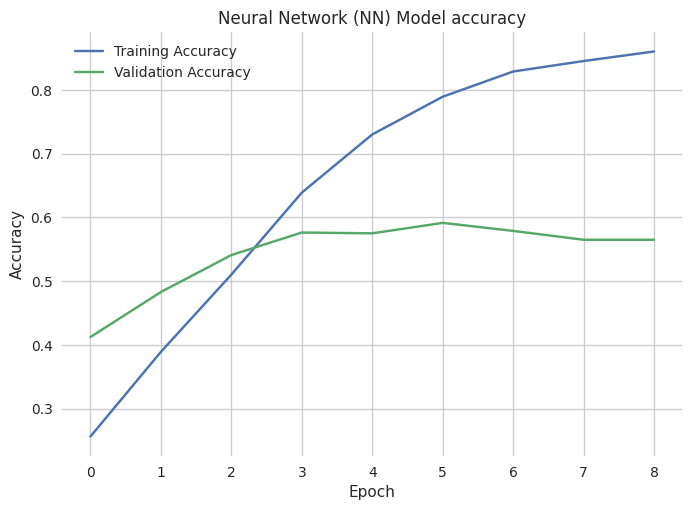

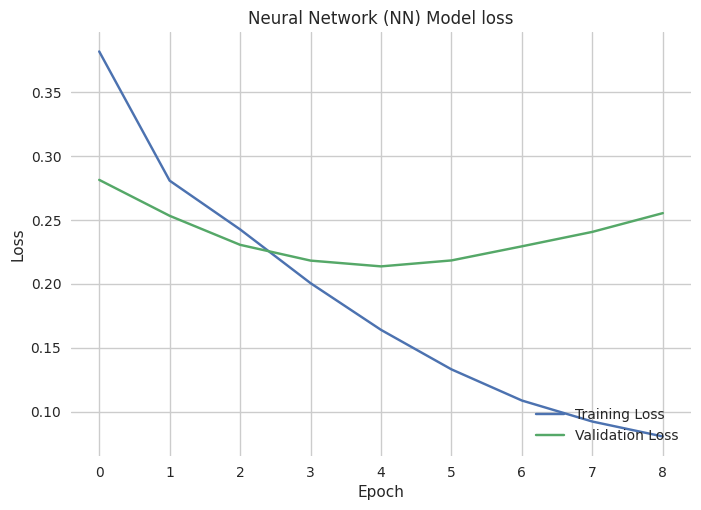

In [38]:
# Plot training & validation accuracy values
plt.plot(nn_model_fit.history['accuracy'])
plt.plot(nn_model_fit.history['val_accuracy'])
plt.title('Neural Network (NN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(nn_model_fit.history['loss'])
plt.plot(nn_model_fit.history['val_loss'])
plt.title('Neural Network (NN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 2) Convolutional Neural Network (CNN)

In [39]:
CNN_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(12, activation = 'sigmoid')
])

In [40]:
CNN_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

### Visualize the Orchestrated CNN MODEL Architecture

In [41]:
CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 128)          25600000  
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 128)         0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 200, 100)          51300     
                                                                 
 batch_normalization (BatchN  (None, 200, 100)         400       
 ormalization)                                                   
                                                                 
 dropout_1 (Dropout)         (None, 200, 100)          0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 100)             

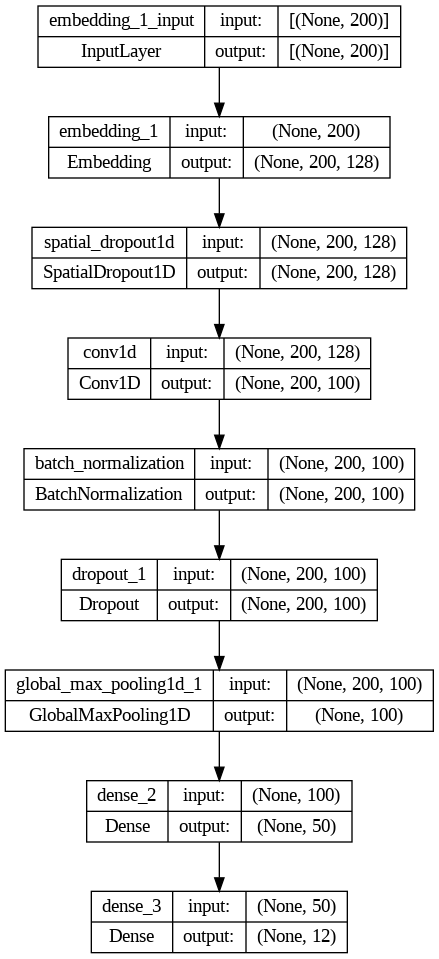

In [42]:
#plot the CNN model architecture

plot_model(CNN_model, to_file='CNN_model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='CNN_model_plot.png')

In [43]:
CNN_model_fit = CNN_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
28/28 [==============================] - 10s 55ms/step - loss: 0.4231 - accuracy: 0.3105 - val_loss: 0.3963 - val_accuracy: 0.2383
Epoch 2/15
28/28 [==============================] - 1s 38ms/step - loss: 0.2554 - accuracy: 0.4681 - val_loss: 0.4357 - val_accuracy: 0.2156
Epoch 3/15
28/28 [==============================] - 1s 36ms/step - loss: 0.2117 - accuracy: 0.5846 - val_loss: 0.4548 - val_accuracy: 0.2711
Epoch 4/15
28/28 [==============================] - 1s 39ms/step - loss: 0.1725 - accuracy: 0.6776 - val_loss: 0.4487 - val_accuracy: 0.3897
Epoch 5/15
28/28 [==============================] - 1s 42ms/step - loss: 0.1408 - accuracy: 0.7431 - val_loss: 0.4267 - val_accuracy: 0.4502


### Evaluate the CNN Model accuracy of our trained model

In [44]:
CNN_train_score = CNN_model.evaluate(X_tra, y_tra, batch_size = batch_size2, verbose = 1)
print('Train loss:', CNN_train_score[0])
print('Train accuracy:', CNN_train_score[1])

28/28 [==============================] - 0s 8ms/step - loss: 0.3962 - accuracy: 0.6497
Train loss: 0.3962271213531494
Train accuracy: 0.6496984958648682


### Evaluate the CNN accuracy base our test samples

In [45]:
CNN_test_score = CNN_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', CNN_test_score[0])
print('Test Accuracy:', CNN_test_score[1])

8/8 [==============================] - 0s 21ms/step - loss: 0.4286 - accuracy: 0.4191
Test Loss: 0.42856287956237793
Test Accuracy: 0.4191286861896515


In [46]:
#Predicting......
print('Predicting....')
y_pred = CNN_model.predict(X_test,batch_size=batch_size2,verbose=1)

Predicting....
8/8 [==============================] - 0s 5ms/step


### Plot Training & Validation Accuracy with the Loss values of the CNN Model

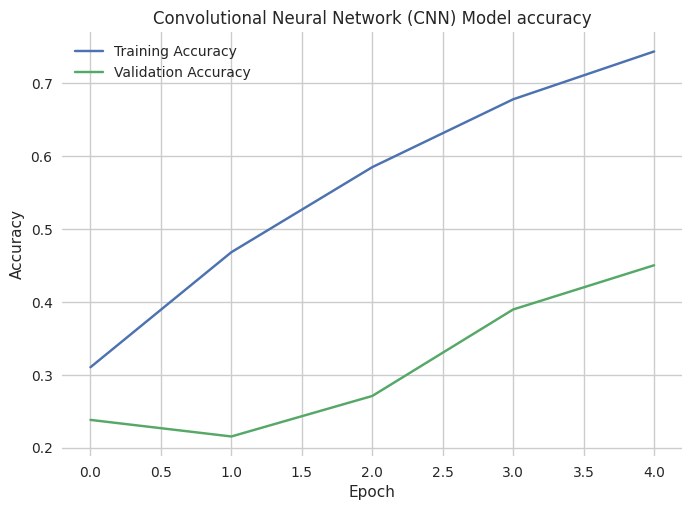

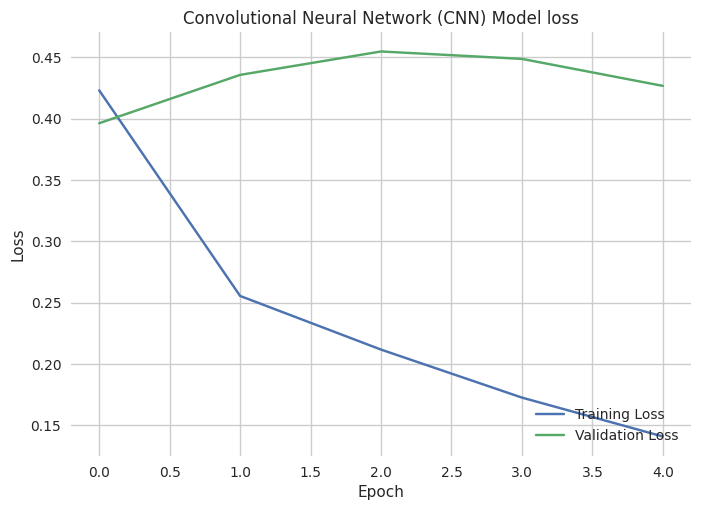

In [47]:
# Plot training & validation accuracy values
plt.plot(CNN_model_fit.history['accuracy'])
plt.plot(CNN_model_fit.history['val_accuracy'])
plt.title('Convolutional Neural Network (CNN) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(CNN_model_fit.history['loss'])
plt.plot(CNN_model_fit.history['val_loss'])
plt.title('Convolutional Neural Network (CNN) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 3) Recurrent Neural Networks (RNNs)

In [48]:
RNN_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    #Fully-connected RNN where the output is to be fed back to input.
    SimpleRNN(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(12, activation = 'sigmoid')
])

In [49]:
RNN_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

### Visualize the Orchestrated RNN MODEL Architecture

In [50]:
RNN_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          25600000  
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 128)         0         
 lDropout1D)                                                     
                                                                 
 simple_rnn (SimpleRNN)      (None, 200, 25)           3850      
                                                                 
 batch_normalization_1 (Batc  (None, 200, 25)          100       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 200, 25)           0         
                                                                 
 global_max_pooling1d_2 (Glo  (None, 25)              

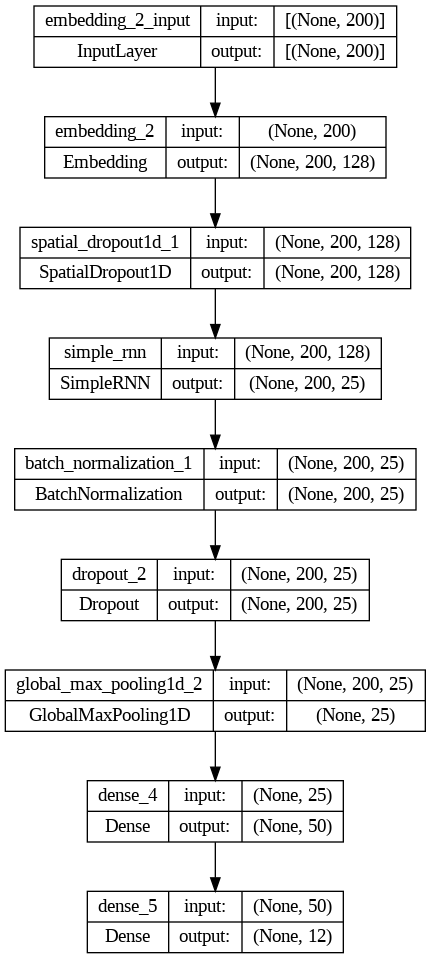

In [51]:
#plot the RNN model architecture

plot_model(RNN_model, to_file='RNN_model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='RNN_model_plot.png')

In [52]:
RNN_model_fit = RNN_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
28/28 [==============================] - 20s 588ms/step - loss: 0.3920 - accuracy: 0.3308 - val_loss: 0.3779 - val_accuracy: 0.4124
Epoch 2/15
28/28 [==============================] - 12s 428ms/step - loss: 0.2946 - accuracy: 0.3798 - val_loss: 0.4215 - val_accuracy: 0.4136
Epoch 3/15
28/28 [==============================] - 6s 217ms/step - loss: 0.2855 - accuracy: 0.3810 - val_loss: 0.4094 - val_accuracy: 0.4174
Epoch 4/15
28/28 [==============================] - 6s 226ms/step - loss: 0.2756 - accuracy: 0.3920 - val_loss: 0.4012 - val_accuracy: 0.4161
Epoch 5/15
28/28 [==============================] - 7s 240ms/step - loss: 0.2596 - accuracy: 0.4321 - val_loss: 0.3924 - val_accuracy: 0.4161


### Evaluate the RNN Model accuracy of our trained model

In [53]:
RNN_train_score = RNN_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', RNN_train_score[0])
print('Train Accuracy:', RNN_train_score[1])

28/28 [==============================] - 1s 18ms/step - loss: 0.3848 - accuracy: 0.4870
Train Loss: 0.3848218023777008
Train Accuracy: 0.48702847957611084


### Evaluate the RNN accuracy base our test samples

In [54]:
RNN_test_score = RNN_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', RNN_test_score[0])
print('Test Accuracy:', RNN_test_score[1])

8/8 [==============================] - 0s 18ms/step - loss: 0.3957 - accuracy: 0.3916
Test Loss: 0.395740807056427
Test Accuracy: 0.39158737659454346


### Plot Training & Validation Accuracy with the Loss values of the RNN Model

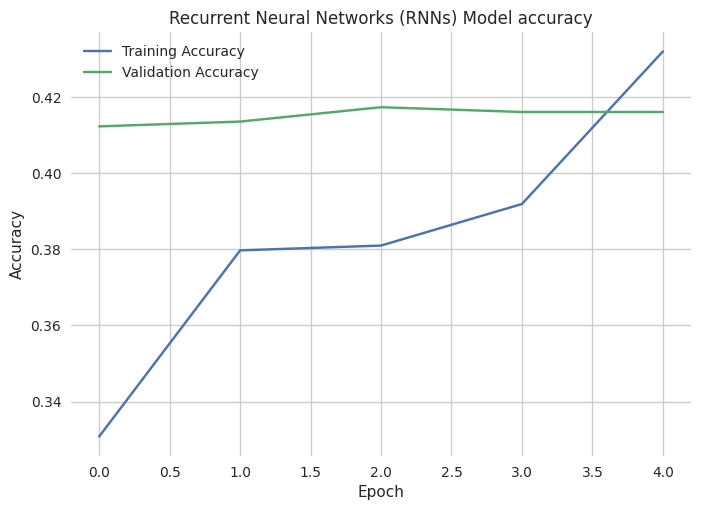

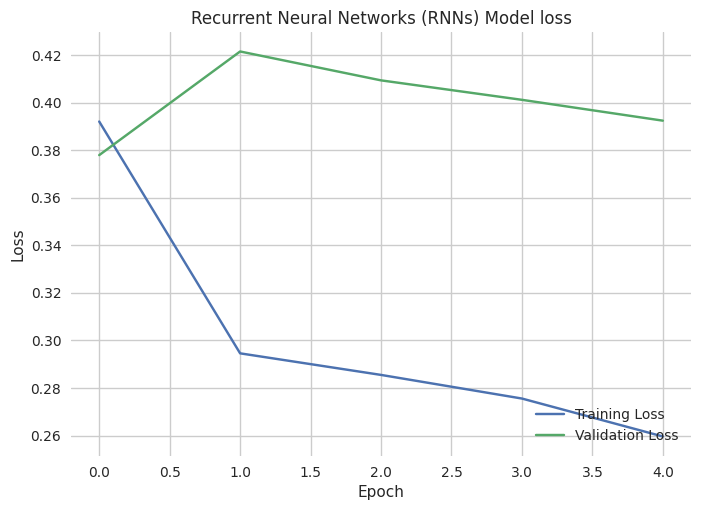

In [55]:
# Plot training & validation accuracy values
plt.plot(RNN_model_fit.history['accuracy'])
plt.plot(RNN_model_fit.history['val_accuracy'])
plt.title('Recurrent Neural Networks (RNNs) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(RNN_model_fit.history['loss'])
plt.plot(RNN_model_fit.history['val_loss'])
plt.title('Recurrent Neural Networks (RNNs) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 4) Long Short-Term Memory (LSTM)

In [56]:
LSTM_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence,
    #So, using this feature will enable the model to look at the context on both the left and the right.
    LSTM(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(12, activation = 'sigmoid')
])

In [57]:
LSTM_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
LSTM_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 128)          25600000  
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 200, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 200, 25)           15400     
                                                                 
 batch_normalization_2 (Batc  (None, 200, 25)          100       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 200, 25)           0         
                                                                 
 global_max_pooling1d_3 (Glo  (None, 25)              

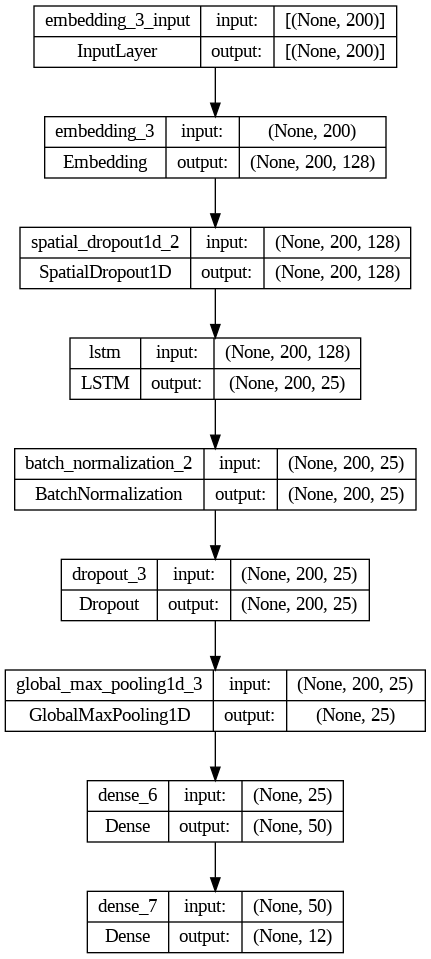

In [58]:
#plot the RNN model architecture

plot_model(LSTM_model, to_file='LSTM_model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='LSTM_model_plot.png')

In [59]:
LSTM_model_fit = LSTM_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/15
28/28 [==============================] - 4s 45ms/step - loss: 0.3283 - accuracy: 0.3579 - val_loss: 0.5896 - val_accuracy: 0.2093
Epoch 2/15
28/28 [==============================] - 1s 27ms/step - loss: 0.2369 - accuracy: 0.5015 - val_loss: 0.5960 - val_accuracy: 0.3569
Epoch 3/15
28/28 [==============================] - 1s 27ms/step - loss: 0.1846 - accuracy: 0.6322 - val_loss: 0.5539 - val_accuracy: 0.4111
Epoch 4/15
28/28 [==============================] - 1s 31ms/step - loss: 0.1366 - accuracy: 0.7375 - val_loss: 0.5168 - val_accuracy: 0.4641
Epoch 5/15
28/28 [==============================] - 1s 30ms/step - loss: 0.1038 - accuracy: 0.7981 - val_loss: 0.4571 - val_accuracy: 0.5057
Epoch 6/15
28/28 [==============================] - 1s 30ms/step - loss: 0.0784 - accuracy: 0.8449 - val_loss: 0.4139 - val_accuracy: 0.5410
Epoch 7/15
28/28 [==============================] - 1s 31ms/step - loss: 0.0601 - accuracy: 0.8589 - val_loss: 0.3570 - val_accuracy: 0.5284
Epoch 8/15
28

### Evaluate the LSTM Model accuracy of our train and test accuracy

In [60]:
LSTM_train_score = LSTM_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', LSTM_train_score[0])
print('Train Accuracy:', LSTM_train_score[1])


LSTM_test_score = LSTM_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', LSTM_test_score[0])
print('Test Accuracy:', LSTM_test_score[1])

28/28 [==============================] - 1s 5ms/step - loss: 0.0586 - accuracy: 0.8881
Train Loss: 0.05862561613321304
Train Accuracy: 0.8880942463874817
8/8 [==============================] - 0s 6ms/step - loss: 0.2432 - accuracy: 0.5573
Test Loss: 0.24317117035388947
Test Accuracy: 0.5573360323905945


### Plot Training & Validation Accuracy with the Loss values of the LSTM Model

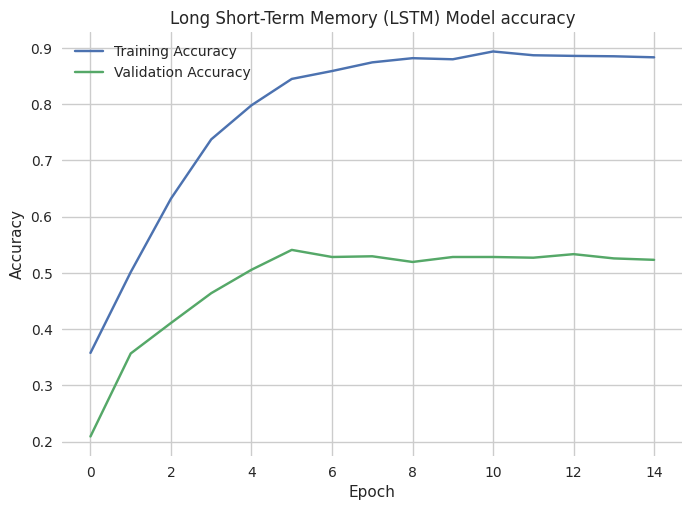

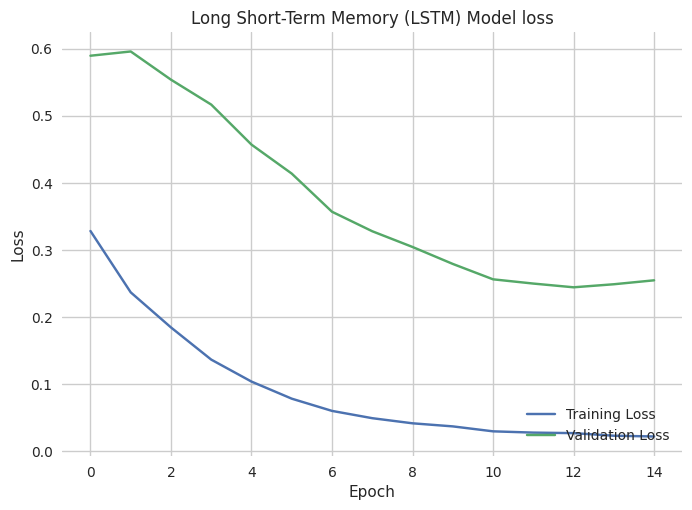

In [61]:
# Plot training & validation accuracy values
plt.plot(LSTM_model_fit.history['accuracy'])
plt.plot(LSTM_model_fit.history['val_accuracy'])
plt.title('Long Short-Term Memory (LSTM) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training<<<<<<<<<<<<<<<<<<<<l & validation loss values
plt.plot(LSTM_model_fit.history['loss'])
plt.plot(LSTM_model_fit.history['val_loss'])
plt.title('Long Short-Term Memory (LSTM) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 5) Bidirectional Long Short_Term Memory (Bidirectional LSTM)

In [62]:
Bil_LSTM_model = Sequential([
    Embedding(input_dim=max_features, input_length=max_len, output_dim=embedding_dims),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence,
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch,
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(12, activation = 'sigmoid')
])

In [63]:
Bil_LSTM_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
Bil_LSTM_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 200, 128)          25600000  
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 200, 128)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 200, 50)          30800     
 l)                                                              
                                                                 
 batch_normalization_3 (Batc  (None, 200, 50)          200       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 200, 50)           0         
                                                      

### Visualize the Orchestrated Bidirectional LSTM

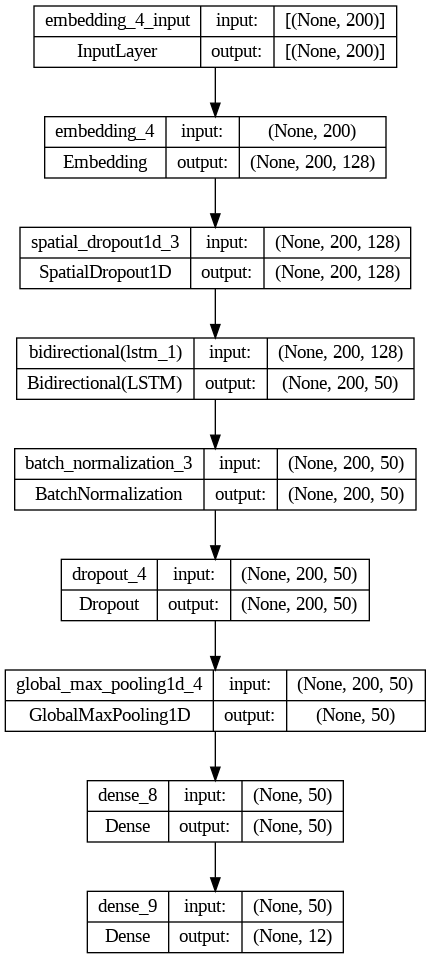

In [64]:
#plot the RNN model architecture
plot_model(Bil_LSTM_model, to_file='Bil_LSTM_model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='Bil_LSTM_model_plot.png')

In [65]:
Bil_LSTM_model_fit = Bil_LSTM_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
28/28 [==============================] - 8s 70ms/step - loss: 0.3395 - accuracy: 0.3391 - val_loss: 0.5514 - val_accuracy: 0.4124
Epoch 2/15
28/28 [==============================] - 1s 37ms/step - loss: 0.2146 - accuracy: 0.5689 - val_loss: 0.5236 - val_accuracy: 0.4401
Epoch 3/15
28/28 [==============================] - 1s 37ms/step - loss: 0.1478 - accuracy: 0.7242 - val_loss: 0.4768 - val_accuracy: 0.4968
Epoch 4/15
28/28 [==============================] - 1s 37ms/step - loss: 0.1014 - accuracy: 0.8061 - val_loss: 0.4180 - val_accuracy: 0.4653
Epoch 5/15
28/28 [==============================] - 1s 37ms/step - loss: 0.0738 - accuracy: 0.8476 - val_loss: 0.3778 - val_accuracy: 0.4918
Epoch 6/15
28/28 [==============================] - 1s 37ms/step - loss: 0.0558 - accuracy: 0.8645 - val_loss: 0.3229 - val_accuracy: 0.5435
Epoch 7/15
28/28 [==============================] - 1s 37ms/step - loss: 0.0478 - accuracy: 0.8729 - val_loss: 0.2987 - val_accuracy: 0.5914
Epoch 8/15
28

### Evaluate Bidirectional LSTM train and test score

In [66]:
#Train
Bil_LSTM_train_score = Bil_LSTM_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', Bil_LSTM_train_score[0])
print('Train Accuracy:', Bil_LSTM_train_score[1])

#Test
Bil_LSTM_test_score = Bil_LSTM_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', Bil_LSTM_test_score[0])
print('Test Accuracy:', Bil_LSTM_test_score[1])

28/28 [==============================] - 0s 9ms/step - loss: 0.0264 - accuracy: 0.9124
Train Loss: 0.026363888755440712
Train Accuracy: 0.9123545289039612
8/8 [==============================] - 1s 10ms/step - loss: 0.2305 - accuracy: 0.5839
Test Loss: 0.2305191308259964
Test Accuracy: 0.583875834941864


### Plot Training & Validation Accuracy with the Loss values of the Bidirectional LSTM Model

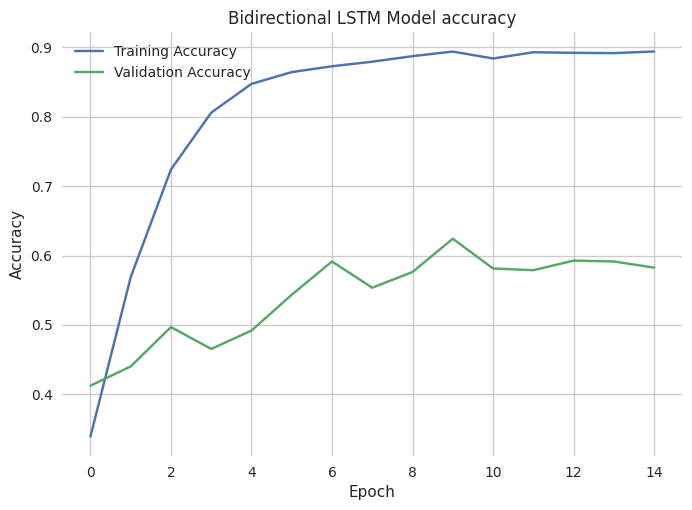

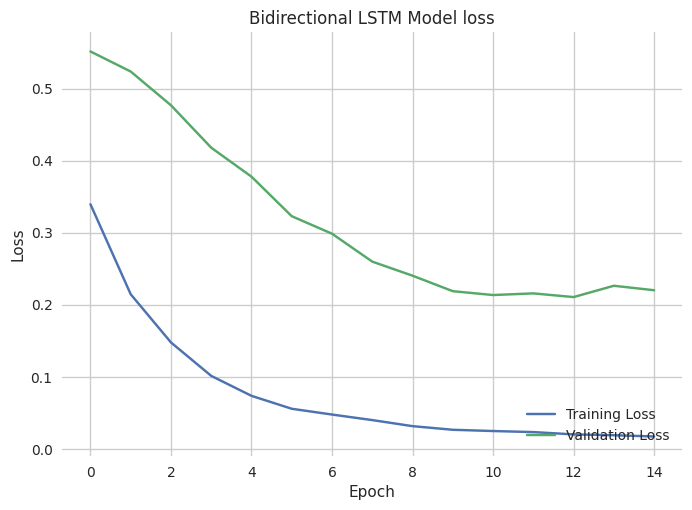

In [67]:
# Plot training & validation accuracy values
plt.plot(Bil_LSTM_model_fit.history['accuracy'])
plt.plot(Bil_LSTM_model_fit.history['val_accuracy'])
plt.title('Bidirectional LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_LSTM_model_fit.history['loss'])
plt.plot(Bil_LSTM_model_fit.history['val_loss'])
plt.title('Bidirectional LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 6) Gated Recurrent Unit (GRU)

In [68]:
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim=max_features, output_dim=embedding_dims, trainable = False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool])
preds = Dense(12, activation="sigmoid")(model)
GRU_model = Model(sequence_input, preds)
GRU_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=1e-3),metrics=['accuracy'])

### Visualize the Orchestrated GRU MODEL Architecture

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_5 (Embedding)        (None, 200, 128)     25600000    ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d_4 (SpatialDr  (None, 200, 128)    0           ['embedding_5[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 gru (GRU)                      (None, 200, 128)     99072       ['spatial_dropout1d_4[0][0]']

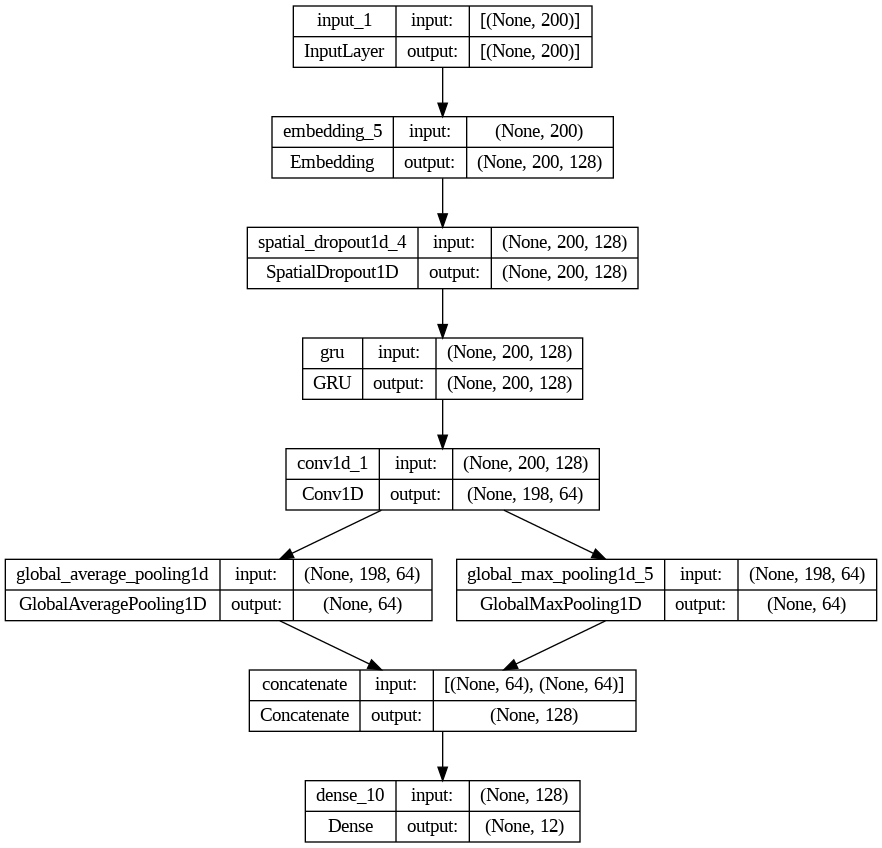

In [69]:
GRU_model.summary()

#plot the GRU model architecture

plot_model(GRU_model, to_file='GRU_model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='GRU_model_plot.png')

In [70]:
GRU_model_fit = GRU_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
28/28 [==============================] - 27s 895ms/step - loss: 0.4150 - accuracy: 0.2662 - val_loss: 0.2904 - val_accuracy: 0.4124
Epoch 2/15
28/28 [==============================] - 22s 804ms/step - loss: 0.2887 - accuracy: 0.3812 - val_loss: 0.2829 - val_accuracy: 0.4124
Epoch 3/15
28/28 [==============================] - 21s 762ms/step - loss: 0.2876 - accuracy: 0.3812 - val_loss: 0.2826 - val_accuracy: 0.4124
Epoch 4/15
28/28 [==============================] - 23s 827ms/step - loss: 0.2876 - accuracy: 0.3812 - val_loss: 0.2829 - val_accuracy: 0.4124
Epoch 5/15
28/28 [==============================] - 23s 824ms/step - loss: 0.2874 - accuracy: 0.3812 - val_loss: 0.2828 - val_accuracy: 0.4124
Epoch 6/15
28/28 [==============================] - 21s 771ms/step - loss: 0.2869 - accuracy: 0.3812 - val_loss: 0.2819 - val_accuracy: 0.4124
Epoch 7/15
28/28 [==============================] - 23s 830ms/step - loss: 0.2869 - accuracy: 0.3812 - val_loss: 0.2827 - val_accuracy: 0.4124

### Evaluate the GRU Model train and test score

In [71]:
#Train
GRU_train_score = GRU_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', GRU_train_score[0])
print('Train Accuracy:', GRU_train_score[1])

#Test
GRU_test_score = GRU_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', GRU_test_score[0])
print('Test Accuracy:', GRU_test_score[1])

28/28 [==============================] - 2s 58ms/step - loss: 0.2740 - accuracy: 0.3891
Train Loss: 0.27399253845214844
Train Accuracy: 0.38914597034454346
8/8 [==============================] - 1s 63ms/step - loss: 0.2779 - accuracy: 0.3856
Test Loss: 0.2779330611228943
Test Accuracy: 0.38557836413383484


### Plot Training & Validation Accuracy with the Loss values of the GRU Model

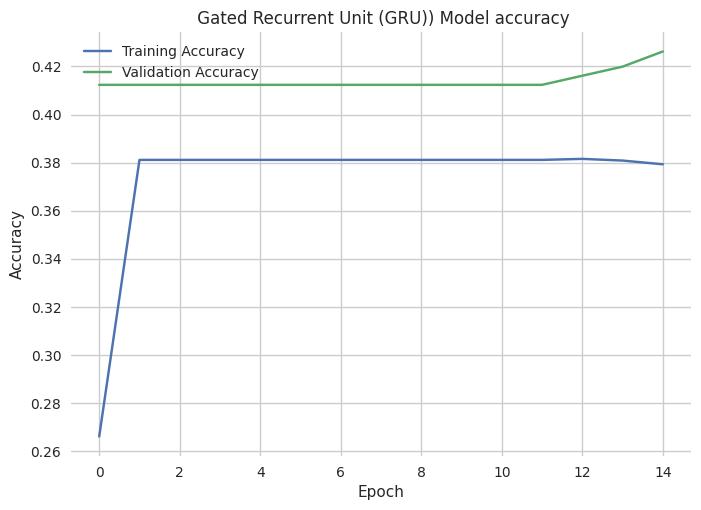

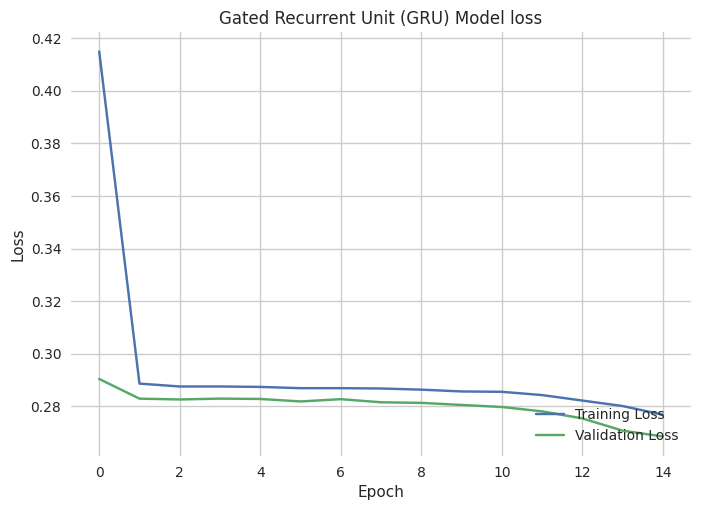

In [72]:
# Plot training & validation accuracy values
plt.plot(GRU_model_fit.history['accuracy'])
plt.plot(GRU_model_fit.history['val_accuracy'])
plt.title(' Gated Recurrent Unit (GRU)) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(GRU_model_fit.history['loss'])
plt.plot(GRU_model_fit.history['val_loss'])
plt.title('Gated Recurrent Unit (GRU) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 7 )  Bidirectional Gated Recurrent Unit (Bidirecitonal GRU)

In [73]:
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim=max_features, output_dim=embedding_dims, trainable = False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = Bidirectional(GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool])
preds = Dense(12, activation="sigmoid")(model)
Bil_GRU_model = Model(sequence_input, preds)
Bil_GRU_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=1e-3),metrics=['accuracy'])

### Visualize the Orchestrated Bidirectional GRU Model Architecture



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_6 (Embedding)        (None, 200, 128)     25600000    ['input_2[0][0]']                
                                                                                                  
 spatial_dropout1d_5 (SpatialDr  (None, 200, 128)    0           ['embedding_6[0][0]']            
 opout1D)                                                                                         
                                                                                                  
 bidirectional_1 (Bidirectional  (None, 200, 256)    198144      ['spatial_dropout1d_5[0][0]

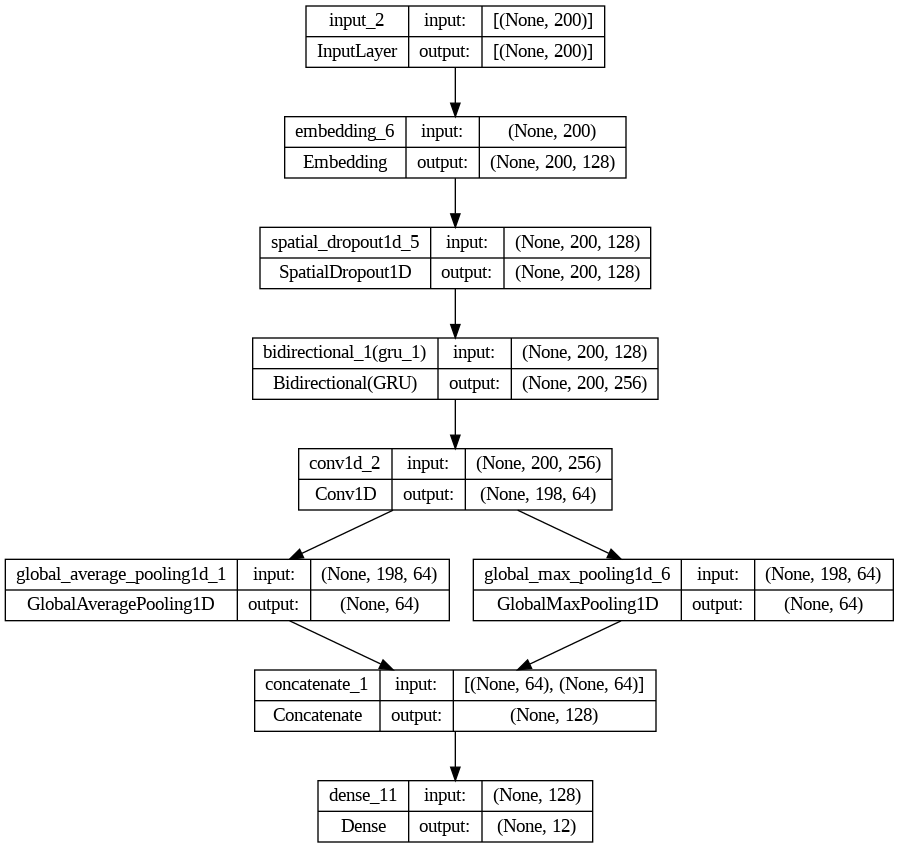

In [74]:
Bil_GRU_model.summary()

#plot the GRU model architecture

plot_model(Bil_GRU_model, to_file='Bil_GRU_model_plot.png', show_shapes=True, show_layer_names=True)
Image(retina=True, filename='Bil_GRU_model_plot.png')

In [75]:
Bil_GRU_model_fit = Bil_GRU_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
28/28 [==============================] - 49s 2s/step - loss: 0.3985 - accuracy: 0.3329 - val_loss: 0.2853 - val_accuracy: 0.4124
Epoch 2/15
28/28 [==============================] - 42s 2s/step - loss: 0.2891 - accuracy: 0.3812 - val_loss: 0.2829 - val_accuracy: 0.4124
Epoch 3/15
28/28 [==============================] - 42s 2s/step - loss: 0.2876 - accuracy: 0.3812 - val_loss: 0.2821 - val_accuracy: 0.4124
Epoch 4/15
28/28 [==============================] - 43s 2s/step - loss: 0.2875 - accuracy: 0.3812 - val_loss: 0.2824 - val_accuracy: 0.4124
Epoch 5/15
28/28 [==============================] - 44s 2s/step - loss: 0.2871 - accuracy: 0.3812 - val_loss: 0.2832 - val_accuracy: 0.4124
Epoch 6/15
28/28 [==============================] - 43s 2s/step - loss: 0.2873 - accuracy: 0.3812 - val_loss: 0.2831 - val_accuracy: 0.4124
Epoch 7/15
28/28 [==============================] - 42s 1s/step - loss: 0.2870 - accuracy: 0.3812 - val_loss: 0.2827 - val_accuracy: 0.4124


### Evaluate the GRU Model train and test score

In [76]:
#Train
Bil_GRU_train_score = Bil_GRU_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', Bil_GRU_train_score[0])
print('Train Accuracy:', Bil_GRU_train_score[1])

#Test
Bil_GRU_test_score = Bil_GRU_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', Bil_GRU_test_score[0])
print('Test Accuracy:', Bil_GRU_test_score[1])

28/28 [==============================] - 3s 108ms/step - loss: 0.2866 - accuracy: 0.3812
Train Loss: 0.28661617636680603
Train Accuracy: 0.3811527192592621
8/8 [==============================] - 2s 174ms/step - loss: 0.2889 - accuracy: 0.3806
Test Loss: 0.2888501286506653
Test Accuracy: 0.3805708587169647


### Plot Training & Validation Accuracy with the Loss values of the Bil GRU Model

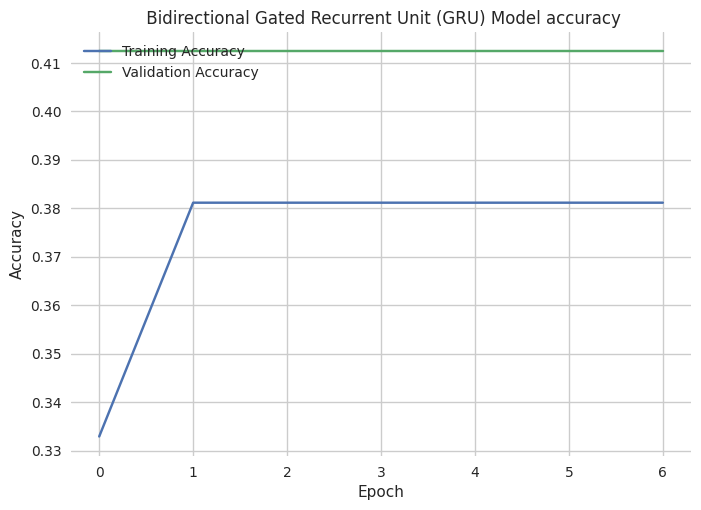

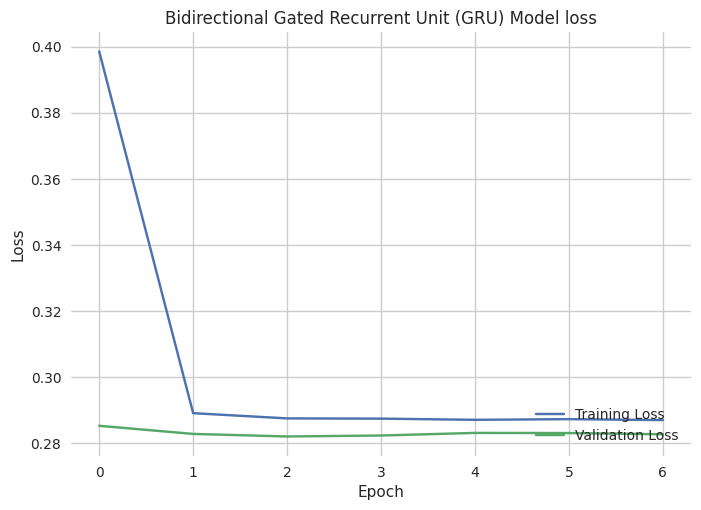

In [77]:
# Plot training & validation accuracy values
plt.plot(Bil_GRU_model_fit.history['accuracy'])
plt.plot(Bil_GRU_model_fit.history['val_accuracy'])
plt.title(' Bidirectional Gated Recurrent Unit (GRU) Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_GRU_model_fit.history['loss'])
plt.plot(Bil_GRU_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

# Evaluation of Experiment Without Pre-trained Embedding

#### Computing the highest of the evaluation matrics (per model)

In [78]:
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['Neural Network', 'CNN', 'RNNs', 'LSTM', ' Bidirectional LSTM', 'GRU', 'Bidirectional GRU'],
                       [
                        #Loss Evaluation
                        round(np.max(nn_model_fit.history['loss']), 3), round(np.max(CNN_model_fit.history['loss']), 3), round(np.max(RNN_model_fit.history['loss']), 3),
                        round(np.max(LSTM_model_fit.history['loss']), 3), round(np.max(Bil_LSTM_model_fit.history['loss']), 3), round(np.max(GRU_model_fit.history['loss']), 3),
                        round(np.max(Bil_GRU_model_fit.history['loss']), 3)],

                        #Accuracy Evaluation
                        [round(np.max(nn_model_fit.history['accuracy']), 3), round(np.max(CNN_model_fit.history['accuracy']), 3), round(np.max(RNN_model_fit.history['accuracy']), 3),
                        round(np.max(LSTM_model_fit.history['accuracy']), 3), round(np.max(Bil_LSTM_model_fit.history['accuracy']), 3), round(np.max(GRU_model_fit.history['accuracy']), 3),
                        round(np.max(Bil_GRU_model_fit.history['accuracy']), 3)],

                        # #mean_pred Evaluation
                        # [round(np.max(nn_model_fit.history['mean_pred']), 3), round(np.max(CNN_model_fit.history['mean_pred']), 3), round(np.max(RNN_model_fit.history['mean_pred']), 3),
                        # round(np.max(LSTM_model_fit.history['mean_pred']), 3), round(np.max(Bil_LSTM_model_fit.history['mean_pred']), 3), round(np.max(GRU_model_fit.history['mean_pred']), 3),
                        # round(np.max(Bil_GRU_model_fit.history['mean_pred']), 3)],

                        # #F1-Measure Evaluation fmeasure
                        # [round(np.max(nn_model_fit.history['fmeasure']), 3), round(np.max(CNN_model_fit.history['fmeasure']), 3), round(np.max(RNN_model_fit.history['fmeasure']), 3),
                        # round(np.max(LSTM_model_fit.history['fmeasure']), 3), round(np.max(Bil_LSTM_model_fit.history['fmeasure']), 3), round(np.max(GRU_model_fit.history['fmeasure']), 3),
                        # round(np.max(Bil_GRU_model_fit.history['fmeasure']), 3)],

                        # #Precision Evaluation precision
                        # [round(np.max(nn_model_fit.history['precision']), 3), round(np.max(CNN_model_fit.history['precision']), 3), round(np.max(RNN_model_fit.history['precision']), 3),
                        # round(np.max(LSTM_model_fit.history['precision']), 3), round(np.max(Bil_LSTM_model_fit.history['precision']), 3), round(np.max(GRU_model_fit.history['precision']), 3),
                        # round(np.max(Bil_GRU_model_fit.history['precision']), 3)],

                        # #ROC AUC Evaluation auroc
                        # [round(np.max(nn_model_fit.history['auroc']), 3), round(np.max(CNN_model_fit.history['auroc']), 3), round(np.max(RNN_model_fit.history['auroc']), 3),
                        # round(np.max(LSTM_model_fit.history['auroc']), 3), round(np.max(Bil_LSTM_model_fit.history['auroc']), 3), round(np.max(GRU_model_fit.history['auroc']), 3),
                        # round(np.max(Bil_GRU_model_fit.history['auroc']), 3)],

                        # #Recall Evaluation
                        # [round(np.max(nn_model_fit.history['recall']), 3), round(np.max(CNN_model_fit.history['recall']), 3), round(np.max(RNN_model_fit.history['recall']), 3),
                        # round(np.max(LSTM_model_fit.history['recall']), 3), round(np.max(Bil_LSTM_model_fit.history['recall']), 3), round(np.max(GRU_model_fit.history['recall']), 3),
                        # round(np.max(Bil_GRU_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'multi-label')

In [79]:
py.plot(data, filename='multi-label', image='png')

'https://plotly.com/~Ranjitp20/1/'

In [80]:
import IPython

# Assuming you have the URL of the Plotly image
image_url = 'https://plotly.com/~Ranjitp20/1.png'

# Display the image in the notebook
IPython.display.Image(url=image_url)

#### Computing the mean average of the evaluation matrics (per model)

In [81]:
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['Neural Network', 'CNN', 'RNNs', 'LSTM', 'Bidirectional LSTM', 'GRU', 'Bidirectional GRU'],
                       [
                        #Loss Evaluation
                        round(np.mean(nn_model_fit.history['loss']), 3), round(np.mean(CNN_model_fit.history['loss']), 3), round(np.mean(RNN_model_fit.history['loss']), 3),
                        round(np.mean(LSTM_model_fit.history['loss']), 3), round(np.mean(Bil_LSTM_model_fit.history['loss']), 3), round(np.mean(GRU_model_fit.history['loss']), 3),
                        round(np.mean(Bil_GRU_model_fit.history['loss']), 3)],

                        #Accuracy Evaluation
                        [round(np.mean(nn_model_fit.history['accuracy']), 3), round(np.mean(CNN_model_fit.history['accuracy']), 3), round(np.mean(RNN_model_fit.history['accuracy']), 3),
                        round(np.mean(LSTM_model_fit.history['accuracy']), 3), round(np.mean(Bil_LSTM_model_fit.history['accuracy']), 3), round(np.mean(GRU_model_fit.history['accuracy']), 3),
                        round(np.mean(Bil_GRU_model_fit.history['accuracy']), 3)],

                        # #mean_pred Evaluation
                        # [round(np.mean(nn_model_fit.history['mean_pred']), 3), round(np.mean(CNN_model_fit.history['mean_pred']), 3), round(np.mean(RNN_model_fit.history['mean_pred']), 3),
                        # round(np.mean(LSTM_model_fit.history['mean_pred']), 3), round(np.mean(Bil_LSTM_model_fit.history['mean_pred']), 3), round(np.mean(GRU_model_fit.history['mean_pred']), 3),
                        # round(np.mean(Bil_GRU_model_fit.history['mean_pred']), 3)],

                        # #F1-Measure Evaluation fmeasure
                        # [round(np.mean(nn_model_fit.history['fmeasure']), 3), round(np.mean(CNN_model_fit.history['fmeasure']), 3), round(np.mean(RNN_model_fit.history['fmeasure']), 3),
                        # round(np.mean(LSTM_model_fit.history['fmeasure']), 3), round(np.mean(Bil_LSTM_model_fit.history['fmeasure']), 3), round(np.mean(GRU_model_fit.history['fmeasure']), 3),
                        # round(np.mean(Bil_GRU_model_fit.history['fmeasure']), 3)],

                        # #Precision Evaluation precision
                        # [round(np.mean(nn_model_fit.history['precision']), 3), round(np.mean(CNN_model_fit.history['precision']), 3), round(np.mean(RNN_model_fit.history['precision']), 3),
                        # round(np.mean(LSTM_model_fit.history['precision']), 3), round(np.mean(Bil_LSTM_model_fit.history['precision']), 3), round(np.mean(GRU_model_fit.history['precision']), 3),
                        # round(np.mean(Bil_GRU_model_fit.history['precision']), 3)],

                        # #ROC AUC Evaluation auroc
                        # [round(np.mean(nn_model_fit.history['auroc']), 3), round(np.mean(CNN_model_fit.history['auroc']), 3), round(np.mean(RNN_model_fit.history['auroc']), 3),
                        # round(np.mean(LSTM_model_fit.history['auroc']), 3), round(np.mean(Bil_LSTM_model_fit.history['auroc']), 3), round(np.mean(GRU_model_fit.history['auroc']), 3),
                        # round(np.mean(Bil_GRU_model_fit.history['auroc']), 3)],

                        # #Recall Evaluation
                        # [round(np.mean(nn_model_fit.history['recall']), 3), round(np.mean(CNN_model_fit.history['recall']), 3), round(np.mean(RNN_model_fit.history['recall']), 3),
                        # round(np.mean(LSTM_model_fit.history['recall']), 3), round(np.mean(Bil_LSTM_model_fit.history['recall']), 3), round(np.mean(GRU_model_fit.history['recall']), 3),
                        # round(np.mean(Bil_GRU_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'multi-label_without_pre-trained_embedding')

In [82]:
py.plot(data, filename = 'multi-label_without_pre-trained_embedding', image='png')

'https://plotly.com/~Ranjitp20/3/'

In [83]:
import IPython

# Assuming you have the URL of the Plotly image
image_url = 'https://plotly.com/~Ranjitp20/3.png'

# Display the image in the notebook
IPython.display.Image(url=image_url)

### Score confusion table

In [84]:
# concat all training, validation and testing accuracy scores
NN_Accuracy = ['Neural Network',
               np.mean(nn_model_fit.history['accuracy']),
               np.mean(nn_model_fit.history['val_accuracy']),
               nn_test_score[1]]

CNN_Accuracy = ['Convolutional Neural Network (CNN)',
                np.mean(CNN_model_fit.history['accuracy']),
                np.mean(CNN_model_fit.history['val_accuracy']),
                CNN_test_score[1]]

RNN_Accuracy = ['Recurrent Neural Networks (RNNs)',
                np.mean(RNN_model_fit.history['accuracy']),
                np.mean(RNN_model_fit.history['val_accuracy']),
                RNN_test_score[1]]

LSTM_Accuracy = ['LSTM',
                  np.mean(LSTM_model_fit.history['accuracy']),
                  np.mean(LSTM_model_fit.history['val_accuracy']),
                  LSTM_test_score[1]]

Bidirectional_LSTM_Accuracy = ['Bidirectional LSTM',
                    np.mean(Bil_LSTM_model_fit.history['accuracy']),
                    np.mean(Bil_LSTM_model_fit.history['val_accuracy']),
                    Bil_LSTM_test_score[1]]

GRU_Accuracy = ['GRU',
                    np.mean(GRU_model_fit.history['accuracy']),
                    np.mean(GRU_model_fit.history['val_accuracy']),
                    GRU_test_score[1]]

Bidirectional_GRU_Accuracy = ['Bidirectional GRU',
                    np.mean(Bil_GRU_model_fit.history['accuracy']),
                    np.mean(Bil_GRU_model_fit.history['val_accuracy']),
                    Bil_GRU_test_score[1]]


# create dataframe
experimentalResult = pd.DataFrame([NN_Accuracy])
# append all other scores
experimentalResult = experimentalResult.append([NN_Accuracy, CNN_Accuracy, RNN_Accuracy, LSTM_Accuracy, Bidirectional_LSTM_Accuracy,
                                                GRU_Accuracy, Bidirectional_GRU_Accuracy])


# beautify the new dataframe
experimentalResult.columns = ['Model', 'Training Accuracy', 'Validation Accuracy', 'Testing Accuracy']
experimentalResult.set_index(['Model'], inplace=True)
experimentalResult
print(experimentalResult)

                                    Training Accuracy  Validation Accuracy  \
Model                                                                        
Neural Network                               0.649870             0.543085   
Neural Network                               0.649870             0.543085   
Convolutional Neural Network (CNN)           0.556780             0.312989   
Recurrent Neural Networks (RNNs)             0.383116             0.415132   
LSTM                                         0.786790             0.482135   
Bidirectional LSTM                           0.809349             0.541488   
GRU                                          0.373374             0.414040   
Bidirectional GRU                            0.374261             0.412358   

                                    Testing Accuracy  
Model                                                 
Neural Network                              0.573360  
Neural Network                              0.573360  

<ipython-input-84-110c9064ff57>:41: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [86]:
nn_model.save("/content/drive/MyDrive/FIRE/model/nn_15")
CNN_model.save("/content/drive/MyDrive/FIRE/model/cnn_15")
RNN_model.save("/content/drive/MyDrive/FIRE/model/rnn_15")
LSTM_model.save("/content/drive/MyDrive/FIRE/model/lstm_15")
Bil_LSTM_model.save("/content/drive/MyDrive/FIRE/model/bilstm_15")
GRU_model.save("/content/drive/MyDrive/FIRE/model/gru_15")
Bil_GRU_model.save("/content/drive/MyDrive/FIRE/model/bigru_15")